## 数据探索

让我们深入研究使用Python进行数据可视化的主要库，以及它们能够生成的各种图表类型。我们将从最基本数据的初步探索开始，然后逐渐深入到更复杂的图表和可视化技术。


结构如下：
1. 初步探索
2. pandas_profiling
3. Matplotlib
4. Seaborn

为了展示不同的可视化效果，我们将使用名为"temporal.csv"的数据集。这些数据集都与人工智能领域相关，包括了三个核心术语（数据科学、机器学习和深度学习）在互联网上的搜索流行度数据。

### 1. 初步探索

In [1]:
import pandas as pd
df = pd.read_csv('./data/github_bot_processed_data.csv')
df.head() #View first 10 data rows

,label,type,site_admin,company,blog,location,hireable,public_repos,public_gists,followers,following,created_at,updated_at,text_bot_count
0,Human,True,False,False,False,False,False,26,1,5,1,2011-09-26 17:27:03+00:00,2023-10-13 11:21:10+00:00,0
1,Human,True,False,False,True,False,True,30,3,9,6,2015-06-29 10:12:46+00:00,2023-10-07 06:26:14+00:00,0
2,Human,True,False,True,True,True,True,103,49,1212,221,2008-08-29 16:20:03+00:00,2023-10-02 02:11:21+00:00,0
3,Bot,True,False,False,False,True,False,49,0,84,2,2014-05-20 18:43:09+00:00,2023-10-12 12:54:59+00:00,0
4,Human,True,False,False,False,False,True,11,1,6,2,2012-08-16 14:19:13+00:00,2023-10-06 11:58:41+00:00,0


通常情况下，pandas都会限制其显示的行数和列数。这可能让很多程序员感到困扰，因为大家都希望能够可视化所有数据。使用这些命令，可以增加限制，可视化整个数据。
对于大型数据集，请谨慎使用此选项，否则可能无法显示它们。

In [2]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [3]:
df.head() 

,label,type,site_admin,company,blog,location,hireable,public_repos,public_gists,followers,following,created_at,updated_at,text_bot_count
0,Human,True,False,False,False,False,False,26,1,5,1,2011-09-26 17:27:03+00:00,2023-10-13 11:21:10+00:00,0
1,Human,True,False,False,True,False,True,30,3,9,6,2015-06-29 10:12:46+00:00,2023-10-07 06:26:14+00:00,0
2,Human,True,False,True,True,True,True,103,49,1212,221,2008-08-29 16:20:03+00:00,2023-10-02 02:11:21+00:00,0
3,Bot,True,False,False,False,True,False,49,0,84,2,2014-05-20 18:43:09+00:00,2023-10-12 12:54:59+00:00,0
4,Human,True,False,False,False,False,True,11,1,6,2,2012-08-16 14:19:13+00:00,2023-10-06 11:58:41+00:00,0


使用 `info` 命令，我们将看到每列包含的数据类型。我们可以发现一列的情况，当使用head命令查看时，该列似乎是数字的，但是如果我们查看后续数据，则字符串格式的值将被编码为字符串。

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   public_repos    19768 non-null  int64 
 8   public_gists    19768 non-null  int64 
 9   followers       19768 non-null  int64 
 10  following       19768 non-null  int64 
 11  created_at      19768 non-null  object
 12  updated_at      19768 non-null  object
 13  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(3)
memory usage: 1.3+ MB


使用Pandas样式，我们可以在查看表格时获得更多信息。首先，我们定义一个格式字典，以便以清晰的方式显示数字（以一定格式显示一定数量的小数、日期和小时，并使用百分比、货币等）。不要惊慌，这是仅显示而不会更改数据，以后再处理也不会有任何问题。

为了给出每种类型的示例，我添加了货币和百分比符号，即使它们对于此数据没有任何意义。

In [5]:
format_dict = {'created_at': '{:%Y-%m}', 'updated_at': '{:%Y-%m}'}

# 确保Month列有日期时间格式

df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])

# 应用样式到可视化
df.head().style.format(format_dict)

,label,type,site_admin,company,blog,location,hireable,public_repos,public_gists,followers,following,created_at,updated_at,text_bot_count
0,Human,True,False,False,False,False,False,26,1,5,1,2011-09,2023-10,0
1,Human,True,False,False,True,False,True,30,3,9,6,2015-06,2023-10,0
2,Human,True,False,True,True,True,True,103,49,1212,221,2008-08,2023-10,0
3,Bot,True,False,False,False,True,False,49,0,84,2,2014-05,2023-10,0
4,Human,True,False,False,False,False,True,11,1,6,2,2012-08,2023-10,0


使用 `describe` 命令，我们将看到数据如何分布，最大值，最小值，均值……

In [6]:
df.describe()

,public_repos,public_gists,followers,following,text_bot_count
count,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000
mean,84.139215,25.214083,245.497015,44.520741,0.061362
std,574.750217,635.690142,1535.939961,366.793439,0.341003
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,7.000000,0.000000,0.000000
50%,35.000000,2.000000,33.000000,4.000000,0.000000
75%,83.000000,10.000000,125.000000,22.000000,0.000000
max,50000.000000,55781.000000,95752.000000,27775.000000,5.000000


还可以用颜色突出显示最大值和最小值。

In [7]:
format_dict = {'created_at': '{:%Y-%m}', 'updated_at': '{:%Y-%m}'}
df.head().style.format(format_dict).highlight_max(color='darkgreen').highlight_min(color='#ff0000')

,label,type,site_admin,company,blog,location,hireable,public_repos,public_gists,followers,following,created_at,updated_at,text_bot_count
0,Human,True,False,False,False,False,False,26,1,5,1,2011-09,2023-10,0
1,Human,True,False,False,True,False,True,30,3,9,6,2015-06,2023-10,0
2,Human,True,False,True,True,True,True,103,49,1212,221,2008-08,2023-10,0
3,Bot,True,False,False,False,True,False,49,0,84,2,2014-05,2023-10,0
4,Human,True,False,False,False,False,True,11,1,6,2,2012-08,2023-10,0


使用颜色渐变来显示数据值。

In [8]:
df.head(10).style.format(format_dict).background_gradient(subset=['public_repos',	'public_gists'	,'followers',	'following'], cmap='BuGn')

,label,type,site_admin,company,blog,location,hireable,public_repos,public_gists,followers,following,created_at,updated_at,text_bot_count
0,Human,True,False,False,False,False,False,26,1,5,1,2011-09,2023-10,0
1,Human,True,False,False,True,False,True,30,3,9,6,2015-06,2023-10,0
2,Human,True,False,True,True,True,True,103,49,1212,221,2008-08,2023-10,0
3,Bot,True,False,False,False,True,False,49,0,84,2,2014-05,2023-10,0
4,Human,True,False,False,False,False,True,11,1,6,2,2012-08,2023-10,0
5,Human,True,False,True,True,True,False,56,1,22,7,2017-04,2023-10,0
6,Human,True,False,True,True,True,True,277,1139,63,16,2008-04,2023-09,0
7,Human,True,False,True,False,True,False,37,1,22,0,2012-01,2023-08,0
8,Human,True,False,False,False,False,False,27,2,37,596,2019-12,2023-10,0
9,Human,True,False,True,True,True,False,42,9,14,2,2013-07,2023-10,0


用条形显示数据值。

In [9]:
df.head().style.format(format_dict).bar(color='red', subset=['followers', 'following'])

,label,type,site_admin,company,blog,location,hireable,public_repos,public_gists,followers,following,created_at,updated_at,text_bot_count
0,Human,True,False,False,False,False,False,26,1,5,1,2011-09,2023-10,0
1,Human,True,False,False,True,False,True,30,3,9,6,2015-06,2023-10,0
2,Human,True,False,True,True,True,True,103,49,1212,221,2008-08,2023-10,0
3,Bot,True,False,False,False,True,False,49,0,84,2,2014-05,2023-10,0
4,Human,True,False,False,False,False,True,11,1,6,2,2012-08,2023-10,0


In [10]:
import numpy as np

# 定义需要进行对数变换的列
num_cols = ['public_repos', 'public_gists', 'followers', 'following']

# 对这些列进行对数变换，同时添加新列到DataFrame
df['log_public_repos'] = np.log(df['public_repos'] + 1)  # 加1避免log(0)
df['log_public_gists'] = np.log(df['public_gists'] + 1)
df['log_followers'] = np.log(df['followers'] + 1)
df['log_following'] = np.log(df['following'] + 1)

# 移除原始列
df = df.drop(columns=num_cols)
df.head()

,label,type,site_admin,company,blog,location,hireable,created_at,updated_at,text_bot_count,log_public_repos,log_public_gists,log_followers,log_following
0,Human,True,False,False,False,False,False,2011-09-26 17:27:03+00:00,2023-10-13 11:21:10+00:00,0,3.295837,0.693147,1.791759,0.693147
1,Human,True,False,False,True,False,True,2015-06-29 10:12:46+00:00,2023-10-07 06:26:14+00:00,0,3.433987,1.386294,2.302585,1.945910
2,Human,True,False,True,True,True,True,2008-08-29 16:20:03+00:00,2023-10-02 02:11:21+00:00,0,4.644391,3.912023,7.100852,5.402677
3,Bot,True,False,False,False,True,False,2014-05-20 18:43:09+00:00,2023-10-12 12:54:59+00:00,0,3.912023,0.000000,4.442651,1.098612
4,Human,True,False,False,False,False,True,2012-08-16 14:19:13+00:00,2023-10-06 11:58:41+00:00,0,2.484907,0.693147,1.945910,1.098612


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   label             19768 non-null  object             
 1   type              19768 non-null  bool               
 2   site_admin        19768 non-null  bool               
 3   company           19768 non-null  bool               
 4   blog              19768 non-null  bool               
 5   location          19768 non-null  bool               
 6   hireable          19768 non-null  bool               
 7   created_at        19768 non-null  datetime64[ns, UTC]
 8   updated_at        19768 non-null  datetime64[ns, UTC]
 9   text_bot_count    19768 non-null  int64              
 10  log_public_repos  19768 non-null  float64            
 11  log_public_gists  19768 non-null  float64            
 12  log_followers     19768 non-null  float64            
 13  l

### 2. Matplotlib

Matplotlib是用于以图形方式可视化数据的最基本的库。它包含许多我们可以想到的图形。仅仅因为它是基本的并不意味着它并不强大，我们将要讨论的许多其他数据可视化库都基于它。

Matplotlib的图表由两个主要部分组成，即轴（界定图表区域的线）和图形（我们在其中绘制轴，标题和来自轴区域的东西），现在让我们创建最简单的图：

In [15]:
import matplotlib.pyplot as plt

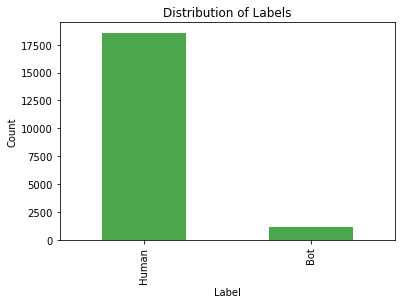

In [16]:
# 示例：绘制标签类别的计数条形图
label_counts = df['label'].value_counts()
label_counts.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

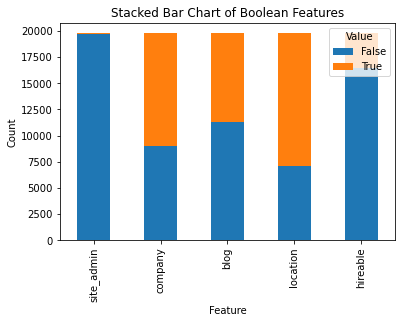

In [17]:
# 示例：绘制布尔特征的堆积柱状图
bool_features = ['site_admin', 'company', 'blog', 'location', 'hireable']

# 创建一个DataFrame，包含各布尔特征的取值计数
bool_counts = df[bool_features].apply(lambda x: x.value_counts())

# 绘制堆积柱状图
bool_counts.T.plot(kind='bar', stacked=True)
plt.xlabel('Feature')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Boolean Features')
plt.legend(title='Value', loc='upper right')
plt.show()


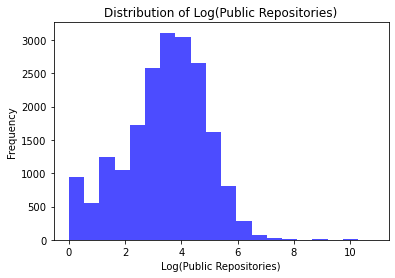

In [18]:
# 示例：绘制public_repos的对数变换后的直方图
log_public_repos = df['log_public_repos']  # 使用对数变换，并避免log(0)
plt.hist(log_public_repos, bins=20, color='blue', alpha=0.7)
plt.xlabel('Log(Public Repositories)')
plt.ylabel('Frequency')
plt.title('Distribution of Log(Public Repositories)')
plt.show()

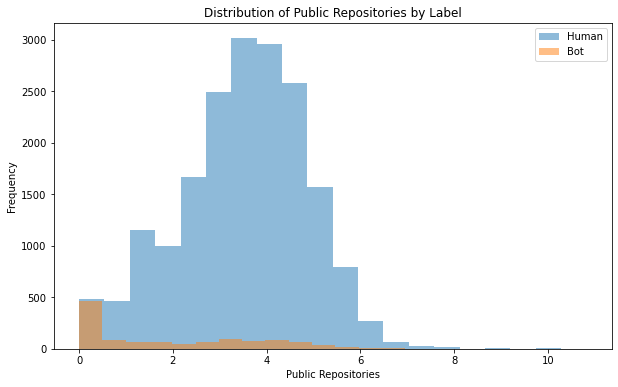

In [19]:
import matplotlib.pyplot as plt

# 示例：绘制不同标签类别下public_repos的分布图
plt.figure(figsize=(10, 6))
for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.hist(subset['log_public_repos'], bins=20, alpha=0.5, label=label)

plt.xlabel('Public Repositories')
plt.ylabel('Frequency')
plt.title('Distribution of Public Repositories by Label')
plt.legend()
plt.show()


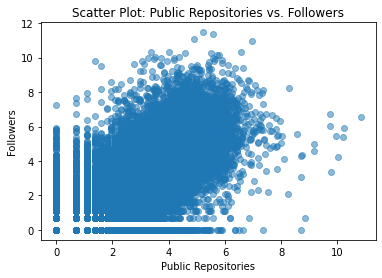

In [20]:
# 示例：绘制public_repos与followers之间的散点图
plt.scatter(df['log_public_repos'], df['log_followers'], alpha=0.5)
plt.xlabel('Public Repositories')
plt.ylabel('Followers')
plt.title('Scatter Plot: Public Repositories vs. Followers')
plt.show()

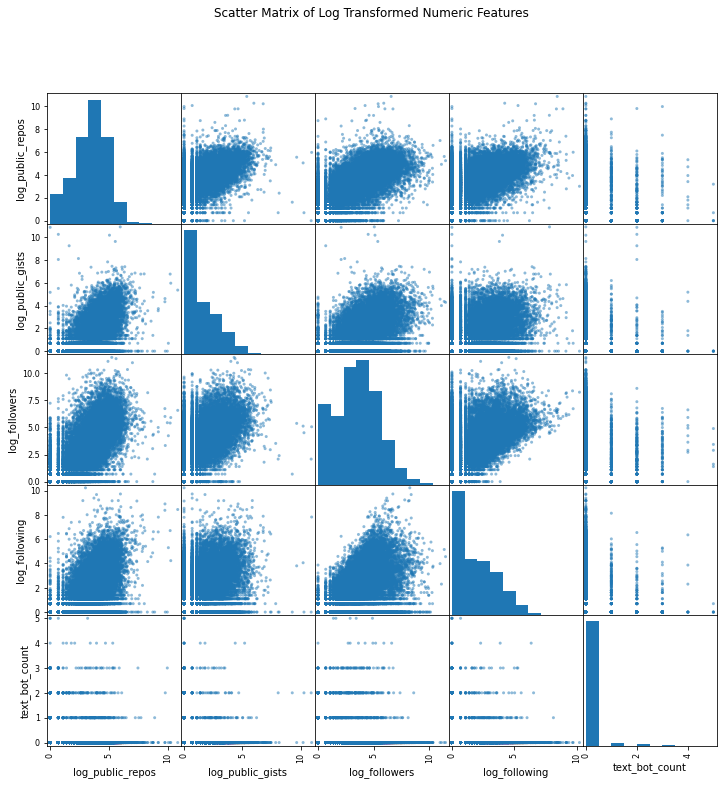

In [21]:
import pandas.plotting as pd_plotting

num_features = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following','text_bot_count']

# 绘制对数变换后的散点矩阵
pd_plotting.scatter_matrix(df[num_features], diagonal='hist', alpha=0.5, figsize=(12, 12))
plt.suptitle('Scatter Matrix of Log Transformed Numeric Features')
plt.show()


### 3. Seaborn

Seaborn是基于Matplotlib的库。基本上，它提供给我们的是更好的图形和功能，只需一行代码即可制作复杂类型的图形。

我们导入库并使用sns.set（）初始化图形样式，如果没有此命令，图形将仍然具有与Matplotlib相同的样式。我们显示了最简单的图形之一，散点图

In [22]:
import seaborn as sns

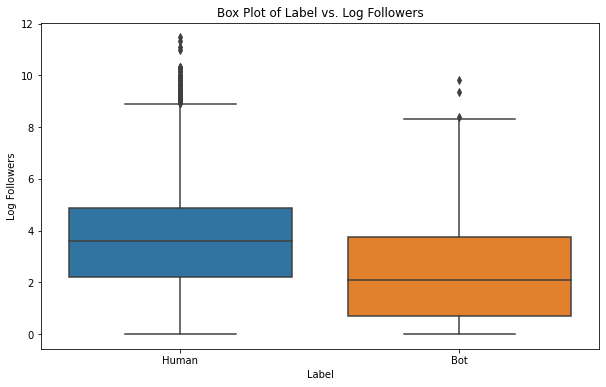

In [23]:
# 箱线图：使用 sns.boxplot() 可视化各个特征相对于 label 的分布，帮助您了解不同类别之间的差异。 

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='log_followers')
plt.title('Box Plot of Label vs. Log Followers')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()



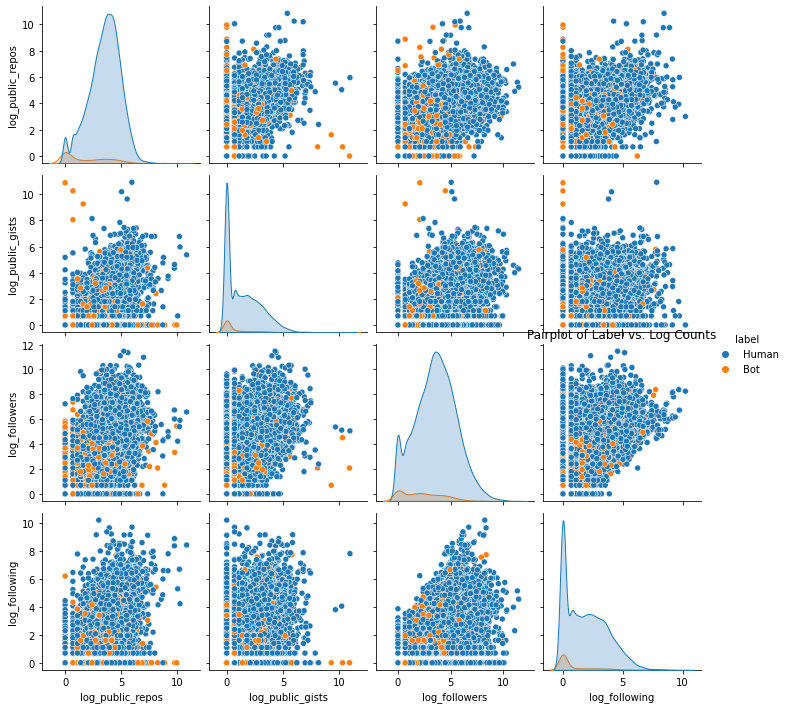

In [24]:
# 成对特征图表：使用 seaborn 的 pairplot 来查看不同特征之间的成对关系，并使用hue参数将label作为颜色标记。

sns.pairplot(data=df, hue='label', vars=['log_public_repos', 'log_public_gists', 'log_followers', 'log_following'])
plt.title('Pairplot of Label vs. Log Counts')
plt.show()


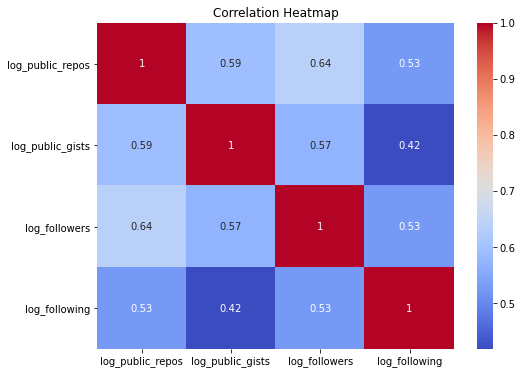

In [25]:
# 热图：使用 sns.heatmap() 可视化各个特征之间的相关性，帮助您了解特征之间的关联

correlation_matrix = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



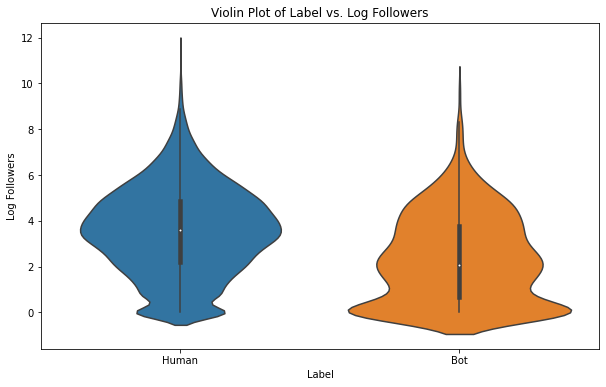

In [26]:
# 小提琴图：使用 sns.violinplot() 类似于箱线图，但提供了更多有关分布的信息。

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='label', y='log_followers')
plt.title('Violin Plot of Label vs. Log Followers')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()


### 4. pandas_profiling

pandas_profiling 是一个库，可使用我们的数据生成交互式报告，我们可以看到数据的分布，数据的类型以及可能出现的问题。

In [27]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof

<ipython-input-27-17227a7bafd9>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.79s/it]
